In [73]:
import numpy as np

numdata2 = np.arange(15).reshape(3,5)
numdata2

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [74]:
numdata3 = np.arange(24).reshape(2,4,3)

numdata3

array([[[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8],
        [ 9, 10, 11]],

       [[12, 13, 14],
        [15, 16, 17],
        [18, 19, 20],
        [21, 22, 23]]])

In [75]:
print(numdata2[2,3])
print(numdata2[0:2,3])
print(numdata2[:,1])
print(numdata2[1:2,:])

13
[3 8]
[ 1  6 11]
[[5 6 7 8 9]]


In [76]:
booldata = numdata2 > 4
booldata

array([[False, False, False, False, False],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True]])

In [77]:
numdata2[booldata]

array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [78]:
tmpdata1 = np.array([10,20,30,40])
tmpdata2 = np.array([1,2,3,4])

tmpdata3 = tmpdata1 - tmpdata2
tmpdata3 

array([ 9, 18, 27, 36])

In [79]:
randomdata = np.random.randint(1,30, (3,5), dtype=int)
print(randomdata)
print(randomdata.max())
print(randomdata.min())
print(randomdata.sum())

[[13  9  5 29 11]
 [ 2  5 27  6 17]
 [21  8 10  4 25]]
29
2
192


In [80]:
randomdata1 = np.arange(15).reshape(3,5)
print(randomdata1, "\n")
print(randomdata1.sum(axis=0), "\n")
print(randomdata1.min(axis=1), "\n")
print(randomdata1.max(axis=0), "\n")
print(randomdata1.cumsum(axis=1))

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]] 

[15 18 21 24 27] 

[ 0  5 10] 

[10 11 12 13 14] 

[[ 0  1  3  6 10]
 [ 5 11 18 26 35]
 [10 21 33 46 60]]


In [81]:
#pip install ipywidgets
#jupyter nbextension enable --py widgetsnbextension
#conda install -c conda-forge ipywidgets

%reload_ext autoreload
%autoreload 2
%matplotlib inline

from matplotlib import pyplot as plt
from matplotlib import rcParams
import numpy as np
from pathlib import Path
import pandas as pd
import seaborn as sns
from tqdm.notebook import tqdm
import warnings

rcParams['figure.figsize'] = (16, 8)
plt.style.use('fivethirtyeight')
pd.set_option('max_columns', 100)
pd.set_option("display.precision", 4)
warnings.simplefilter('ignore')

In [82]:
data_dir = Path('../input/')
trn_file = data_dir / 'train.csv'
trn_file = './input/train.csv'
seed = 42

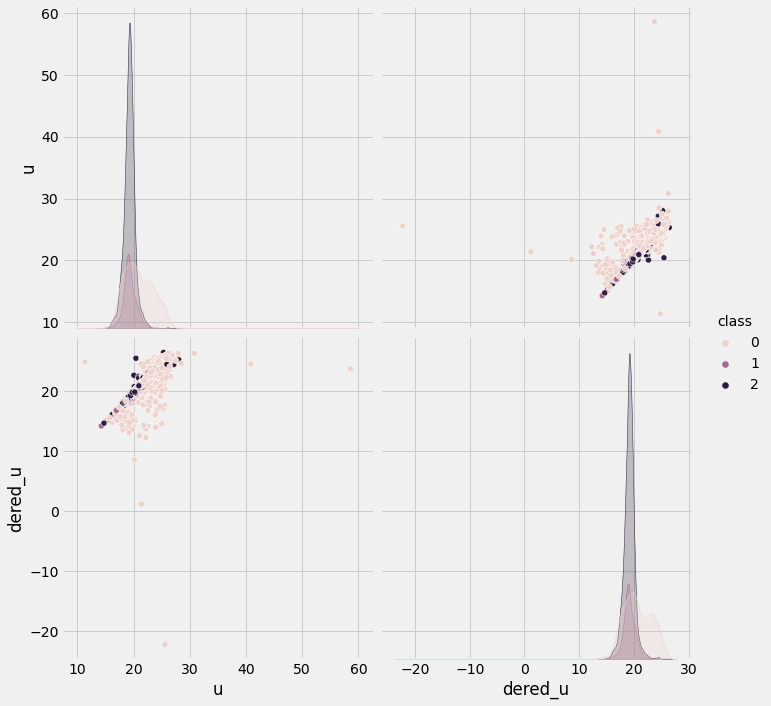

In [83]:
sns.pairplot(trn.sample(n=10000), vars=['u', 'dered_u'], hue='class', size=5)

### 손실함수(Mean Squared Error) 
- 이 예측 모델이 에러를 어떤식으로 계산할것인지 확인 할 때
- 작을수록 좋은 모델

In [84]:
#RMSE 손실함수 정의
#def rmse(y, p):
#    return np.sqrt(np.mean((y - p) ** 2))

rmse = lambda y, p: np.sqrt(np.mean((y - p) ** 2))

In [85]:
x_tmp = trn[trn['class'] != 0][['u']].values
y = trn[trn['class'] != 0]['dered_u'].values
print(x_tmp.shape, y.shape)

(200004, 1) (200004,)


In [86]:
# NumPy를 이용한 선형회귀

alpha = .001
theta0 = .1
theta1 = .1
epoch = 4

x = x_tmp.flatten() # 2차원 배열 -> 1차원 배열
print(x.shape)

(200004,)


In [87]:
#경사 하강법
rmses = []
for i in tqdm(range(epoch)):
    for x_i, y_i in zip(x, y):
        p_i =  theta0 + theta1 * x_i #예측값
        theta0 = theta0 + alpha * (y_i - p_i)
        theta1 = theta1 + alpha * (y_i - p_i) * x_i
    rmses.append(rmse(y, theta0 + theta1 * x))

In [88]:
# zip():같은 길이의 리스트를 같은 인덱스끼리 잘라서 리스트로 반환
#x = ['a', 'b'] 
#y = [1, 2]

#for a, b in zip(x,y):
#    print(a,b)

In [89]:
theta1, theta0

(0.9362306162023849, 1.1088813148478316)

In [90]:
rmses

[0.25618215910731906,
 0.25492967552380746,
 0.25461791287963526,
 0.25454708923095914]

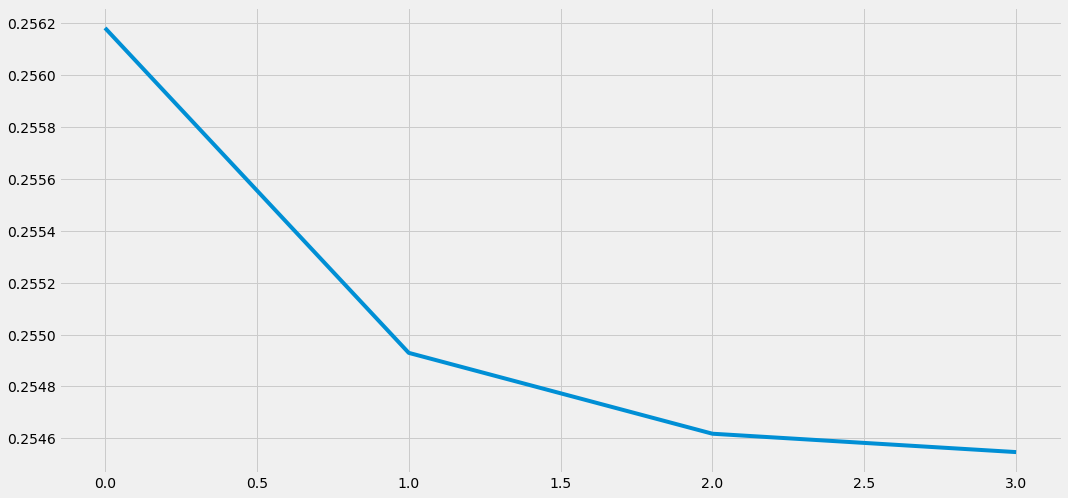

In [91]:
plt.plot(rmses)

Text(0, 0.5, 'dered_u')

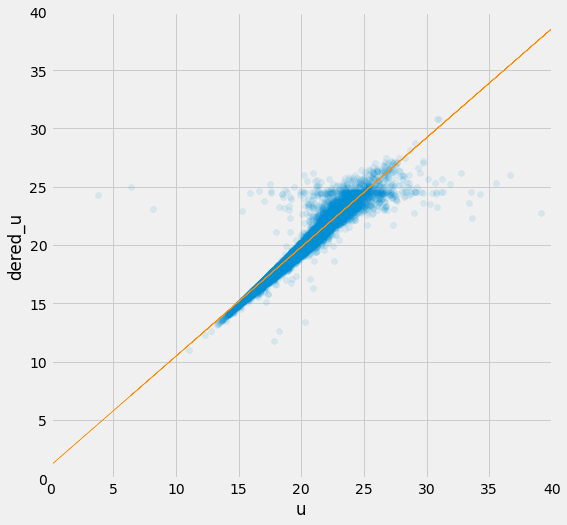

In [92]:
#실제값과 예측값, 파란색 점이 실제값

plt.figure(figsize=(8, 8))
plt.scatter(x_tmp, y, alpha=.1)
plt.plot(x_tmp, theta0 + theta1 * x, color='darkorange', linewidth=.5) # 경사하강법을 통한 선형회귀 모델 예측 값
plt.xlim(0, 40)
plt.ylim(0, 40)
plt.xlabel('u')
plt.ylabel('dered_u')

# scikit-learn을 이용한 선형회귀
### 구지 numpy 라이브러리로 위에서 코딩한 작업을 할 필요가 없다.

### 선형회귀(Linear Regression)
- 가장 널리 쓰이는 모델 중 하나로 통계쪽에서 많이 사용됨
- 종속변수와 독립변수의 관계를 선형 수식으로 표현

In [96]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression() #객체 생성
lr.fit(x_tmp, y) #로드한 데이터를 가지고 학습
p = lr.predict(x_tmp) #예측

### 경사하강법(Gradient descent)
- 1차 직선으로 조금씩 변화 (fitting)시킴
- 손실함수 또는 비용함수의 값이 최소화되는 파라미터를 찾을 때 사용

In [97]:
rmse(y, p)

0.2522450693360897

In [98]:
lr.coef_, lr.intercept_ #계수 확인

(array([0.9320425]), 1.155642417862527)

Text(0, 0.5, 'dered_u')

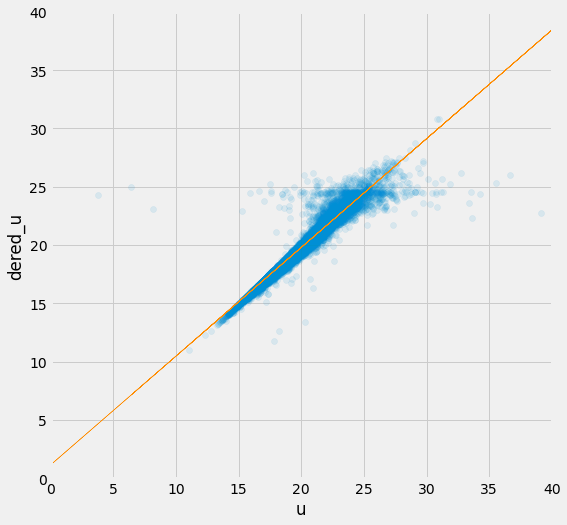

In [99]:
plt.figure(figsize=(8, 8))
plt.scatter(X, y, alpha=.1)
plt.plot(X, p, color='darkorange', linewidth=.5)
plt.xlim(0, 40)
plt.ylim(0, 40)
plt.xlabel('u')
plt.ylabel('dered_u')

# scikit-learn을 이용한 로지스틱회귀
### 로지스틱회귀(Logisic Regression)
- 종속변수가 범주형 변수인 경우(ex: 성별(남 or 여), 암 여부(정상 or 암))
- 종속변수와 독립변수의 관계를 선형 수식으로 나타내지만 종속변수를 로지스틱 함수로 표현(0~1 사이에서 표현함)

In [109]:
x = trn[trn['class'] != 0].drop('class', axis=1)
y = trn[trn['class'] != 0]['class'].values - 1

np.unique(y)

array([0, 1], dtype=int64)

In [110]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, roc_auc_score

lr = LogisticRegression() #객체 생성
lr.fit(x, y) # 모델 학습
p = lr.predict_proba(x)[:, 1] #범주형 모델의 경우에 사용, 각각의 범주에 속할 확률 값을 구할 때, 리턴값은 numpy array으로 각각의 클래스에 속할 확률 예측값

In [111]:
lr.coef_, lr.intercept_

(array([[ 0.7963697 ,  0.0809331 , -1.87822929,  0.51060454, -0.56551304,
         -1.61844337,  2.27472353, -0.05000316, -1.3568166 ,  0.59866919,
         -0.5934478 ,  0.09457491, -0.11081194, -0.14695473, -0.14962635,
         -0.1444308 , -0.14567551, -0.1482729 ]]),
 array([0.22302068]))

In [112]:
log_loss(y, p)

0.36561788270180506

In [113]:
roc_auc_score(y, p)

0.8761747416753973

In [114]:
#pip install kaggler
from kaggler.metrics import plot_roc_curve, plot_pr_curve

Text(0.5, 1.0, 'Precision-Recall Curve')

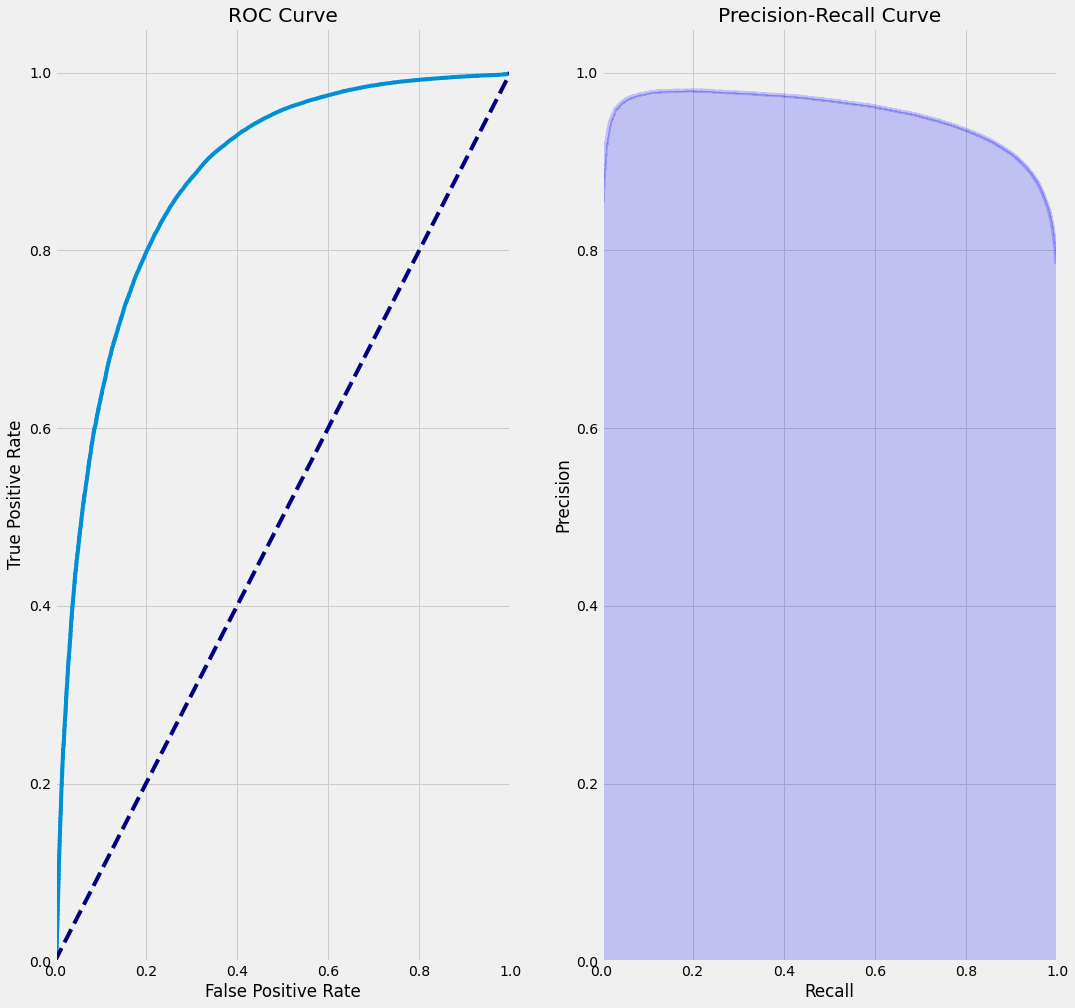

In [117]:
#범주형 모델을 평가할 때에 사용, ROC Curve, Precision-Recall Curve
plt.figure(figsize=(16, 16))
plt.subplot(1, 2, 1)
plot_roc_curve(y, p);
plt.title('ROC Curve')
plt.subplot(1, 2, 2)
plot_pr_curve(y, p);
plt.title('Precision-Recall Curve')